In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
## Functions

# visualisation

def show_percentage_on_plot(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + p.get_height()/80
        ax.annotate(percentage, (x, y), size = 12)

In [3]:
data_path = '../02_data/processed/01_customer_clusters.csv'

In [4]:
df = pd.read_csv(data_path)
df

,Dt_Customer,YearsOfEnrollment,Age,Education,Marital_Status,Kidhome,Teenhome,Recency,Income,MntWines,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,accepted_cmp_before,qtd_cmp_accepted,Cluster
0,2012-09-04,2,55,Graduation,Single,0,0,58,58138.0,635,...,0,0,0,0,0,0,1,0,0,1
1,2014-03-08,0,60,Graduation,Single,1,1,38,46344.0,11,...,0,0,0,0,0,0,0,0,0,2
2,2013-08-21,1,48,Graduation,Together,0,0,26,71613.0,426,...,0,0,0,0,0,0,0,0,0,4
3,2014-02-10,0,30,Graduation,Together,1,0,26,26646.0,11,...,0,0,0,0,0,0,0,0,0,2
4,2014-01-19,0,33,PhD,Married,1,0,94,58293.0,173,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2013-06-13,1,46,Graduation,Married,0,1,46,61223.0,709,...,0,0,0,0,0,0,0,0,0,3
2236,2014-06-10,0,68,PhD,Together,2,1,56,64014.0,406,...,1,0,0,0,0,0,0,1,1,2
2237,2014-01-25,0,33,Graduation,Divorced,0,0,91,56981.0,908,...,0,0,0,1,0,0,0,0,1,5
2238,2014-01-24,0,58,Master,Together,0,1,8,69245.0,428,...,0,0,0,0,0,0,0,0,0,4


In [5]:
df.columns

Index(['Dt_Customer', 'YearsOfEnrollment', 'Age', 'Education',
       'Marital_Status', 'Kidhome', 'Teenhome', 'Recency', 'Income',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response',
       'accepted_cmp_before', 'qtd_cmp_accepted', 'Cluster'],
      dtype='object')

In [6]:
# Using the feature that were used to train the model
selected_columns = ['Recency', 'MntGoldProds', 'Age', 'MntFishProducts',
                    'MntFruits', 'MntMeatProducts', 'MntWines', 'MntSweetProducts',
                    'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'Income']

In [7]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[selected_columns]), columns=selected_columns)
df_scaled['Cluster'] = df['Cluster']

df_mean = (df_scaled.groupby('Cluster').mean())
df_mean

,Recency,MntGoldProds,Age,MntFishProducts,MntFruits,MntMeatProducts,MntWines,MntSweetProducts,NumStorePurchases,NumCatalogPurchases,NumWebPurchases,Income
Cluster,,,,,,,,,,,,
1,0.652353,0.154424,0.253590,0.220537,0.191358,0.138973,0.286898,0.165251,0.541052,0.128979,0.195356,0.088469
2,0.449482,0.034442,0.301790,0.068827,0.057217,0.056745,0.122945,0.047475,0.351171,0.062660,0.112153,0.069825
3,0.418101,0.374719,0.263245,0.288945,0.262241,0.176407,0.344623,0.201397,0.605721,0.170854,0.214498,0.097738
4,0.160046,0.099494,0.287555,0.168181,0.171952,0.106389,0.241947,0.108014,0.502262,0.110744,0.177249,0.082611
5,0.784393,0.035814,0.233518,0.074345,0.074306,0.059298,0.124770,0.056726,0.352925,0.055269,0.111176,0.064010
6,0.129636,0.023806,0.310204,0.058884,0.047593,0.045370,0.121923,0.038860,0.349272,0.049917,0.111683,0.066796


By calculating the variance of the means between the clusters within each variable and selecting a different number of variables with the highest variance, it was found that the 7 variables with the highest variances are the greatest differences, the remaining variables the difference is not. it's so big

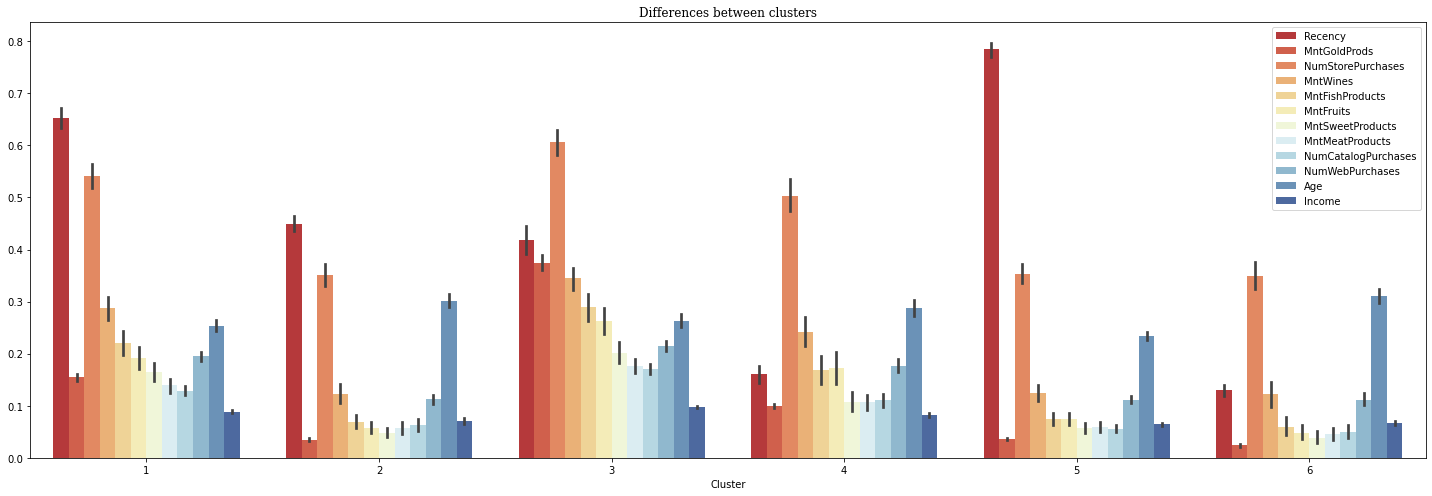

In [20]:
# Preparing data for plot
variances = pd.DataFrame(columns=['Variable', 'Var'])

for column in df_mean.columns:
    variances.loc[len(variances), :] = [column, np.var(df_mean[column])]

# selecting the top 7 variables with the highest variance
selected_columns = list(variances.sort_values('Var', ascending=False,).head(12).Variable.values) + ['Cluster']

tidy = df_scaled[selected_columns].melt(id_vars='Cluster')

# Configuring plot
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(20)

sns.barplot(x='Cluster', y='value', hue='variable', data=tidy, palette='RdYlBu')

plt.legend(loc='upper right')
plt.ylabel('')
plt.title('Differences between clusters', fontdict={'family': 'serif',
                                                    'color':  'black',
                                                    'weight': 'normal',
                                                    'size': 12})

fig.tight_layout()
plt.show()

New insights can be extracted from the above plot.

Customers in group 3 show us that customers who buy a lot directly in stores are the customers who spend the most and also the ones who buy the most through the company's website.

A similar behavior can be seen in group 1, however this group has more people who stay longer without accessing the company's website.

Let's check which group accepted the latest marketing campaign the most.

In [21]:
# Splitting data set in positive responses and negative responses
df_positive = df[df["Response"] == 1]
df_negative = df[df["Response"] == 0]

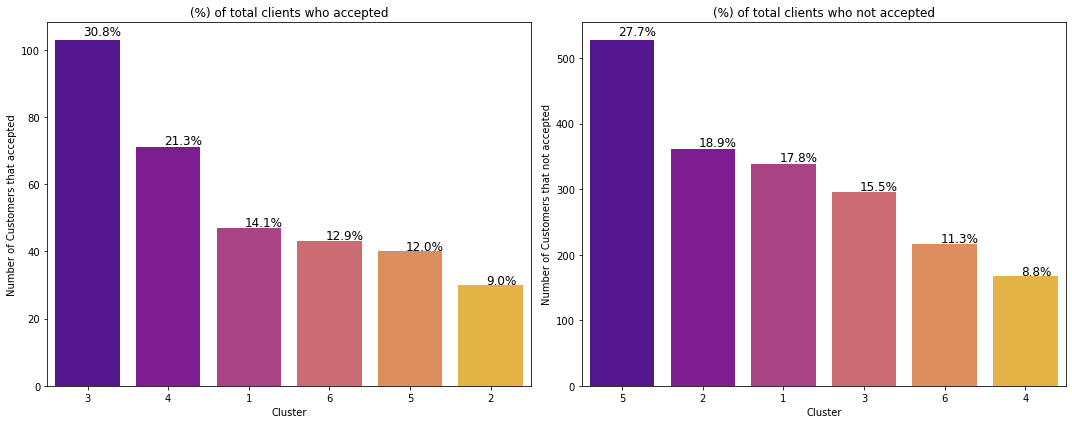

In [22]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'Cluster', data = df_positive,
                   order = df_positive['Cluster'].value_counts().index,
                   palette = 'plasma')
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.Cluster)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'Cluster', data = df_negative,
                   order = df_negative['Cluster'].value_counts().index,
                   palette = 'plasma')
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.Cluster)

fig.tight_layout()
plt.show()

In [23]:
num_positive = df_positive['Cluster'].value_counts().sort_index()
num_total = df['Cluster'].value_counts().sort_index()

acc_per_cluster = list((num_positive / num_total)*100)

for i, percentage in enumerate(acc_per_cluster):
    
    print('Cluster %i: %.2f%s of acceptance' %(i+1, percentage,'%'))

Cluster 1: 12.18% of acceptance
Cluster 2: 7.67% of acceptance
Cluster 3: 25.88% of acceptance
Cluster 4: 29.83% of acceptance
Cluster 5: 7.04% of acceptance
Cluster 6: 16.60% of acceptance


We have clusters 3 and 4 with the highest acceptance rates, and clusters 2 and 6 with the lowest acceptance rates, it is possible to evaluate a correlation between the greater the number of days that the customer was without logging into the company's website and the lower the number of direct purchases in stores added to the low amounts spent on product categories leads to a customer profile that tends not to accept the last campaign, the converse is true, customers who buy more in stores, spend more and log in often on the company's website is more likely to accept the campaign.